Epoch 1/50
269/269 [==============================] - 6s 5ms/step - loss: 108302.6016 - val_loss: 35738.3828
Epoch 2/50
269/269 [==============================] - 1s 3ms/step - loss: 107862.6406 - val_loss: 35067.4414
Epoch 3/50
269/269 [==============================] - 1s 3ms/step - loss: 107168.8750 - val_loss: 34414.3320
Epoch 4/50
269/269 [==============================] - 1s 3ms/step - loss: 106638.1250 - val_loss: 34016.1719
Epoch 5/50
269/269 [==============================] - 1s 3ms/step - loss: 106323.1641 - val_loss: 33791.8867
Epoch 6/50
269/269 [==============================] - 1s 3ms/step - loss: 106128.2500 - val_loss: 33641.7188
Epoch 7/50
269/269 [==============================] - 1s 3ms/step - loss: 106005.5469 - val_loss: 33555.7891
Epoch 8/50
269/269 [==============================] - 1s 3ms/step - loss: 105923.8359 - val_loss: 33494.4570
Epoch 9/50
269/269 [==============================] - 1s 3ms/step - loss: 105869.2031 - val_loss: 33458.7031
Epoch 10/50
269/269

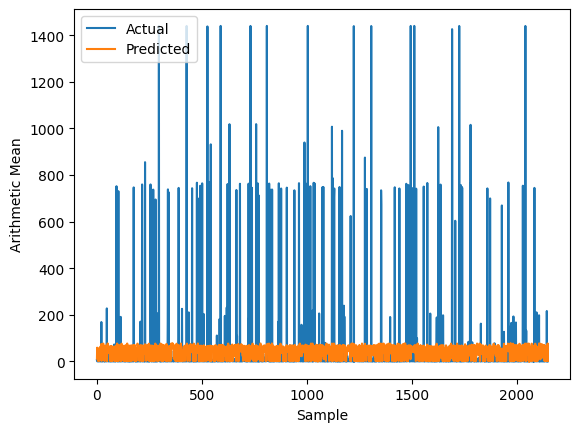

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('epa_air_quality_annual_summary.csv')

# Drop rows with missing target values
df = df.dropna(subset=['arithmetic_mean'])

# Select relevant features and target
features = ['latitude', 'longitude', 'sample_duration', 'year']
target = ['arithmetic_mean']

# Filter relevant columns
df = df[features + target]

# Convert categorical variables to one-hot encoding (if applicable)
# Assuming 'sample_duration' is categorical, we'll one-hot encode it
df = pd.get_dummies(df, columns=['sample_duration'])

# Splitting features and target
X = df.drop(target, axis=1)
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping input for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the Vanilla LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Predictions
predictions = model.predict(X_test_lstm)

# Evaluate the model
loss = model.evaluate(X_test_lstm, y_test)
print("Test Loss:", loss)


# Plotting predictions vs. actual values
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Arithmetic Mean')
plt.legend()
plt.show()
